# Importing required libraries

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md

# Data preprocessing

In [2]:
# load data 
dailyActivity = pd.read_csv('dailyActivity_merged.csv')
sleepDay = pd.read_csv('sleepDay_merged.csv')
weightLogInfo = pd.read_csv('weightLogInfo_merged.csv')

In [3]:
# count unique users
print(len(np.unique(dailyActivity['Id'].values)))
print(len(np.unique(sleepDay['Id'].values)))
print(len(np.unique(weightLogInfo['Id'].values)))

33
24
8


In [4]:
# check if NaN
print(dailyActivity.isnull().values.any())
print(sleepDay.isnull().values.any())
print(weightLogInfo.isnull().values.any())

False
False
True


In [5]:
# change date to datetime and rename column
dailyActivity["ActivityDate"] = pd.to_datetime(dailyActivity["ActivityDate"]).dt.date
dailyActivity = dailyActivity.rename(columns={"ActivityDate": "Date"})
sleepDay["SleepDay"] = pd.to_datetime(sleepDay["SleepDay"]).dt.date
sleepDay = sleepDay.rename(columns={"SleepDay": "Date"})

In [6]:
# merge data
merged_data = pd.merge(dailyActivity, sleepDay, on=["Id","Date"], how="outer").dropna().drop_duplicates().sort_values(by=['Date'])
merged_data.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1.0,327.0,346.0
346,4020332650,2016-04-12,8539,6.12,6.12,0.0,0.15,0.24,5.68,0.0,4,15,331,712,3654,1.0,501.0,541.0
444,4445114986,2016-04-12,3276,2.20,2.20,0.0,0.00,0.00,2.20,0.0,0,0,196,787,2113,2.0,429.0,457.0
506,4702921684,2016-04-12,7213,5.88,5.88,0.0,0.00,0.00,5.85,0.0,0,0,263,718,2947,1.0,425.0,439.0
538,5553957443,2016-04-12,11596,7.57,7.57,0.0,1.37,0.79,5.41,0.0,19,13,277,767,2026,1.0,441.0,464.0


In [7]:
print(len(np.unique(merged_data['Id'].values)))

24


In [8]:
print(len(merged_data.columns.values))

18


# Activity analysis

<ipython-input-9-9e11b769a4ad>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.hist(data=merged_data, x='SedentaryMinutes', **kwargs, Color='Red')


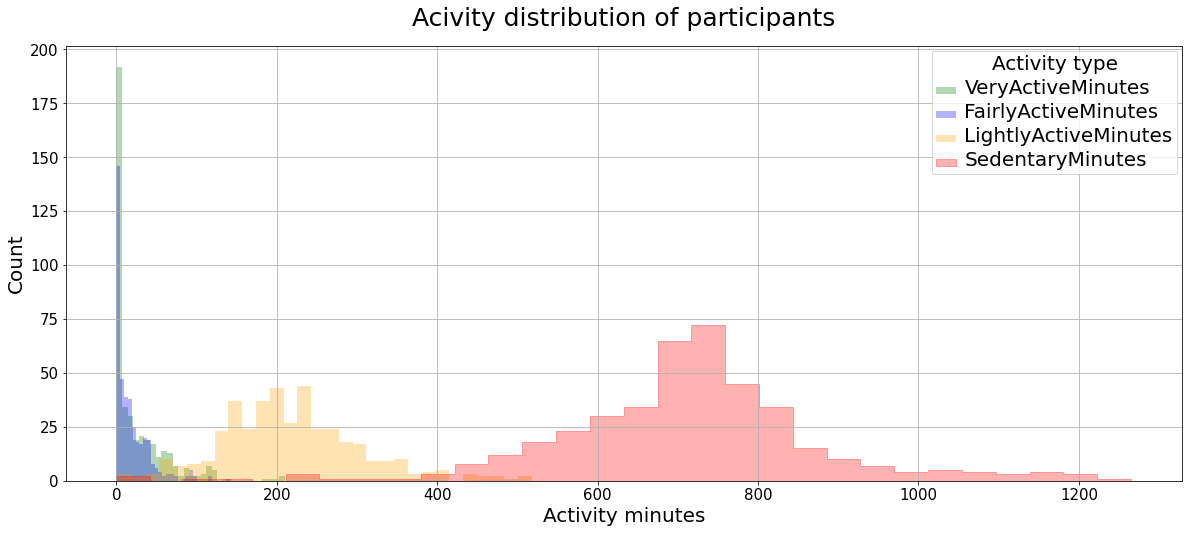

In [9]:
fig, ax = plt.subplots(figsize=(20,8))
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=30)
ax.set_title("Acivity distribution of participants", fontsize=25, pad=20)
ax.set_xlabel("Activity minutes", fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(axis='both', labelsize=15)
plt.hist(data=merged_data, x='VeryActiveMinutes', **kwargs, color='Green')
plt.hist(data=merged_data, x='FairlyActiveMinutes', **kwargs, color='Blue')
plt.hist(data=merged_data, x='LightlyActiveMinutes', **kwargs, color='orange')
plt.hist(data=merged_data, x='SedentaryMinutes', **kwargs, Color='Red')
ax.legend(['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes'], title='Activity type')
plt.setp(ax.get_legend().get_texts(), fontsize='20')
plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.grid()

In [10]:
#mean information about activity
merged_data[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].mean()

VeryActiveMinutes        25.046341
FairlyActiveMinutes      17.924390
LightlyActiveMinutes    216.541463
SedentaryMinutes        712.100000
dtype: float64

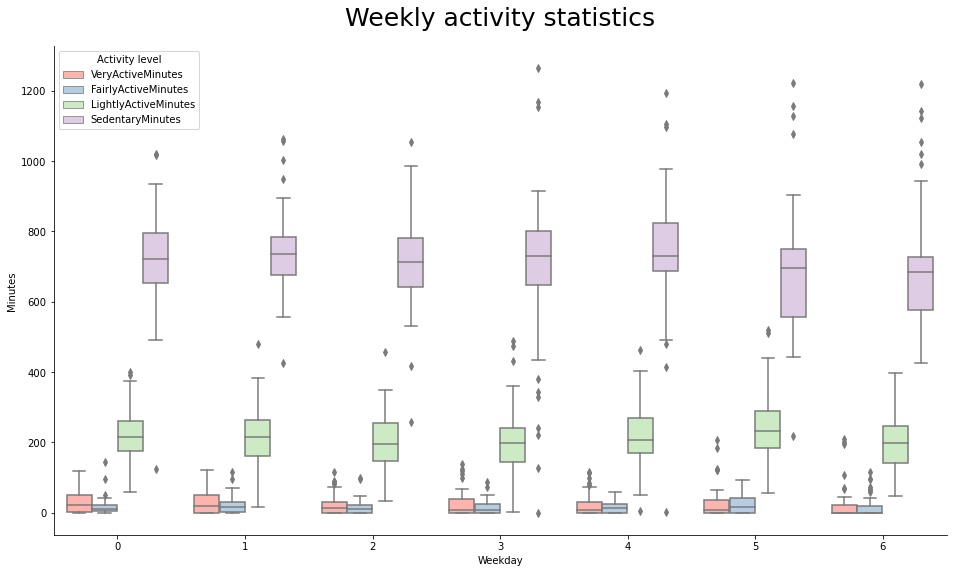

In [11]:
#plot weekly activity statistics
merged_data['Weekday'] = pd.to_datetime(merged_data['Date']).dt.weekday # get weekdays
adata = merged_data[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Weekday']]
molten = pd.melt(adata, id_vars=['Weekday'], value_vars=['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes'], var_name='Activity level', value_name='Minutes')
plt.figure(figsize=(16,9))

# boxplot to inspect distributions
sns.boxplot(data=molten, x="Weekday", y='Minutes', hue='Activity level', saturation=1, palette="Pastel1")
plt.title("Weekly activity statistics", fontsize=25, pad=20)
sns.despine(top=True)
plt.show()

In [12]:
#set total activity
merged_data['Type'] = np.nan
merged_data['Type'] = np.where(merged_data['FairlyActiveMinutes']+merged_data['VeryActiveMinutes']>=60, 'Active', 'Inactive')
merged_data['Total'] = merged_data['FairlyActiveMinutes'] + merged_data['VeryActiveMinutes']

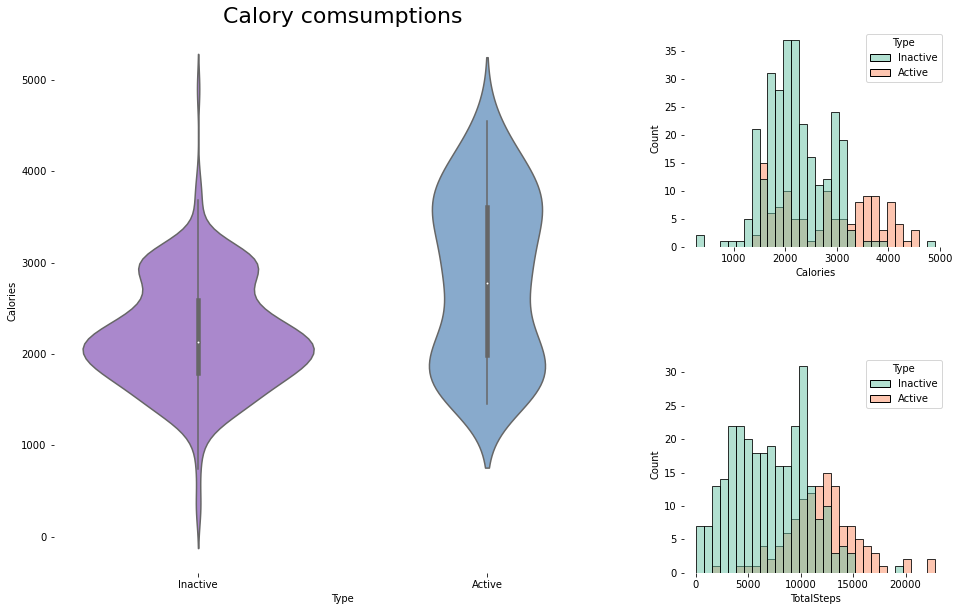

In [13]:
#plot calory consumption and totalsteps
plt.figure(figsize=(16,10))
grid = plt.GridSpec(2, 3, wspace=0.2, hspace=0.5)
ax = plt.subplot(grid[0:2,0:2])
sns.violinplot(data=merged_data, x="Type", y="Calories", saturation=.4, palette="cool_r", ax=ax)
ax.set_title("Calory comsumptions", fontsize=22)
ax = plt.subplot(grid[0,2])
sns.histplot(data=merged_data, x="Calories", hue="Type", multiple="layer", ax=ax, bins=30, palette='Set2')
ax = plt.subplot(grid[1,2])
sns.histplot(data=merged_data, x="TotalSteps", hue="Type", ax=ax, bins=30, palette='Set2')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

In [14]:
#average information
merged_data.groupby('Type').mean()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Weekday,Total
Type,,,,,,,,,,,,,,,,,,,
Active,5.566418e+09,12017.406504,8.606748,8.590000,0.362891,3.421951,1.530406,3.642602,0.002276,64.373984,38.211382,191.276423,717.195122,2821.406504,1.056911,382.276423,432.276423,2.821138,102.585366
Inactive,4.750054e+09,7013.839721,4.900523,4.900523,0.000000,0.599477,0.406829,3.854774,0.000348,8.191638,9.229965,227.369338,709.916376,2204.104530,1.146341,434.986063,469.714286,3.083624,17.421603


In [15]:
#add weekends
merged_data['weekend'] = merged_data['Date'].apply(lambda x: x.weekday() >= 5)
merged_data

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Weekday,Type,Total,weekend
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,328,728,1985,1.0,327.0,346.0,1,Inactive,38,False
346,4020332650,2016-04-12,8539,6.12,6.12,0.0,0.15,0.24,5.68,0.0,...,331,712,3654,1.0,501.0,541.0,1,Inactive,19,False
444,4445114986,2016-04-12,3276,2.20,2.20,0.0,0.00,0.00,2.20,0.0,...,196,787,2113,2.0,429.0,457.0,1,Inactive,0,False
506,4702921684,2016-04-12,7213,5.88,5.88,0.0,0.00,0.00,5.85,0.0,...,263,718,2947,1.0,425.0,439.0,1,Inactive,0,False
538,5553957443,2016-04-12,11596,7.57,7.57,0.0,1.37,0.79,5.41,0.0,...,277,767,2026,1.0,441.0,464.0,1,Inactive,32,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,7086361926,2016-05-12,3789,2.56,2.56,0.0,0.38,0.27,1.89,0.0,...,58,343,1199,1.0,444.0,457.0,3,Inactive,9,False
215,2026352035,2016-05-12,8891,5.51,5.51,0.0,0.00,0.00,5.51,0.0,...,343,330,1364,1.0,456.0,485.0,3,Inactive,0,False
851,8378563200,2016-05-12,4561,3.62,3.62,0.0,0.65,0.27,2.69,0.0,...,102,433,1976,1.0,496.0,546.0,3,Inactive,14,False
712,6962181067,2016-05-12,3587,2.37,2.37,0.0,0.00,0.25,2.11,0.0,...,105,127,928,1.0,516.0,535.0,3,Inactive,8,False


In [16]:
#find inactive users
total_activity = merged_data.groupby('Id') \
                .agg(count=('Total', 'size') \
                ,mean=('Total', 'mean'))
inactive = total_activity[total_activity['count'] > 10][total_activity['mean'] < 60].index.values

#get data for inactive users
ina_data = merged_data[['Id', 'Date', 'Total', 'SedentaryMinutes', 'LightlyActiveMinutes', 'Calories']]
ina = ina_data[ina_data['Id'].isin(inactive)]
ina['weekend'] = ina['Date'].apply(lambda x: x.weekday() >= 5)
ina

<ipython-input-16-e392125b07db>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inactive = total_activity[total_activity['count'] > 10][total_activity['mean'] < 60].index.values
<ipython-input-16-e392125b07db>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ina['weekend'] = ina['Date'].apply(lambda x: x.weekday() >= 5)


,Id,Date,Total,SedentaryMinutes,LightlyActiveMinutes,Calories,weekend
0,1503960366,2016-04-12,38,728,328,1985,False
444,4445114986,2016-04-12,0,787,196,2113,False
506,4702921684,2016-04-12,0,718,263,2947,False
538,5553957443,2016-04-12,32,767,277,2026,False
185,2026352035,2016-04-12,11,706,181,1459,False
...,...,...,...,...,...,...,...
474,4445114986,2016-05-12,0,380,58,1212,False
411,4319703577,2016-05-12,0,0,2,257,False
215,2026352035,2016-05-12,0,330,343,1364,False
712,6962181067,2016-05-12,8,127,105,928,False


In [17]:
#mean information about inactive users
ina.groupby('Id') \
                .agg(count=('Total', 'size') \
                ,total_mean=('Total', 'mean') \
                ,calories_mean=('Calories', 'mean'))

,count,total_mean,calories_mean
Id,,,
1503960366,25,58.200000,1872.280000
2026352035,28,0.392857,1540.785714
2347167796,15,25.333333,1971.333333
4319703577,26,14.923077,2024.692308
4388161847,23,48.000000,3141.739130
4445114986,28,8.142857,2183.142857
4702921684,27,29.148148,3019.555556
5553957443,31,36.419355,1875.677419
6117666160,18,4.888889,2460.833333


# Sleep analysis

In [18]:
#helper method for selecting sleep condition
def sleep_condition(x) -> pd.Series:
    result = []
    for i in x:
        if i/60 > 9:
            result.append('Oversleep')
        elif i/60 <= 9 and i/60 > 7:
            result.append('Adequate')
        else:
            result.append('Inadequate')
    
    return np.array(result)

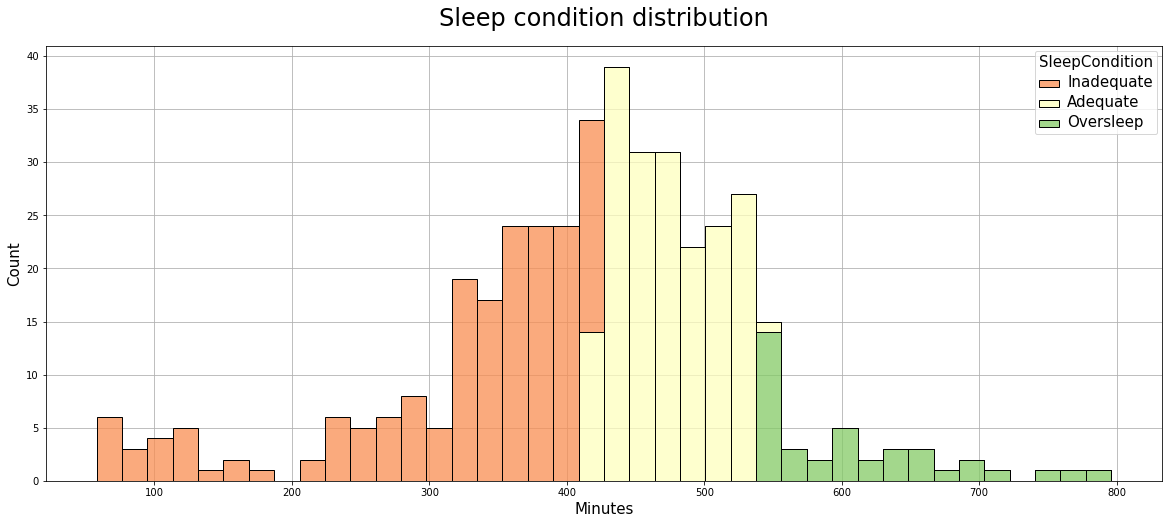

In [19]:
#apply sleep conditions
merged_data['SleepCondition'] = sleep_condition(merged_data['TotalMinutesAsleep'])

# plot sleep condition distribution
fig, ax = plt.subplots(figsize=(20,8))
ax.grid(zorder=0)
sns.histplot(ax=ax, data=merged_data, x="TotalMinutesAsleep", hue="SleepCondition", palette='RdYlGn', multiple="stack", bins=40, zorder=3) #RdYlGn
ax.set_title("Sleep condition distribution", fontsize=24, pad=20)
ax.set_xlabel("Minutes", fontsize=15)
ax.set_ylabel("Count",fontsize=15)
plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.setp(ax.get_legend().get_title(), fontsize='15')

plt.show()

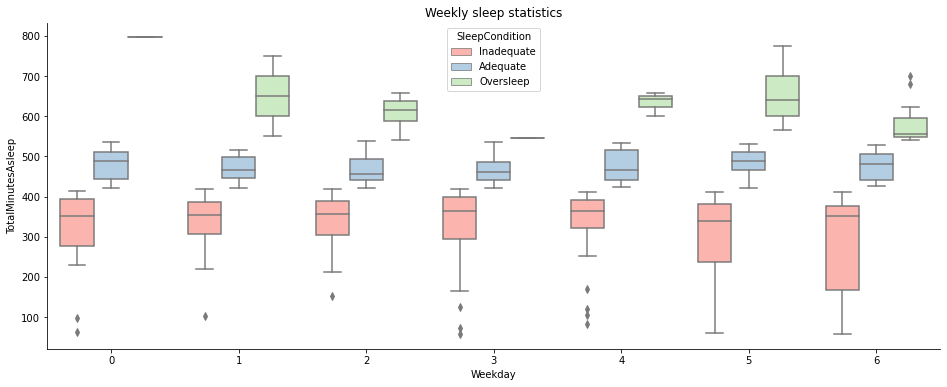

In [20]:
#get weekdays 
merged_data['Weekday'] = pd.to_datetime(merged_data['Date']).dt.weekday

#plot sleep distribution
plt.figure(figsize=(16,6))
sns.boxplot(data=merged_data, x="Weekday", y="TotalMinutesAsleep", saturation=1, palette="Pastel1", hue="SleepCondition")
plt.title("Weekly sleep statistics")
sns.despine(top=True)
plt.show()

In [21]:
#Basic information about the merged dataset
merged_data['TotalMinutesAsleep'].describe()

count    410.000000
mean     419.173171
std      118.635918
min       58.000000
25%      361.000000
50%      432.500000
75%      490.000000
max      796.000000
Name: TotalMinutesAsleep, dtype: float64

In [22]:
#find inadequate sleepers
total_sleep = merged_data.groupby('Id') \
                .agg(count=('TotalMinutesAsleep', 'size') \
                ,mean=('TotalMinutesAsleep', 'mean'))
inadequate_sleepers = total_sleep[total_sleep['count'] > 10][total_sleep['mean'] < 420].index.values


#define inadequate sleeper data 
sleep_data = merged_data[['Id', 'Date', 'TotalMinutesAsleep']]
isa = sleep_data[sleep_data['Id'].isin(inadequate_sleepers)]
isa['weekend'] = isa['Date'].apply(lambda x: x.weekday() >= 5)
isa

<ipython-input-22-e922f2575b8a>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inadequate_sleepers = total_sleep[total_sleep['count'] > 10][total_sleep['mean'] < 420].index.values
<ipython-input-22-e922f2575b8a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isa['weekend'] = isa['Date'].apply(lambda x: x.weekday() >= 5)


,Id,Date,TotalMinutesAsleep,weekend
0,1503960366,2016-04-12,327.0,False
444,4445114986,2016-04-12,429.0,False
506,4702921684,2016-04-12,425.0,False
316,3977333714,2016-04-12,274.0,False
317,3977333714,2016-04-13,295.0,False
...,...,...,...,...
442,4388161847,2016-05-11,469.0,False
29,1503960366,2016-05-11,285.0,False
473,4445114986,2016-05-11,499.0,False
537,4702921684,2016-05-12,404.0,False


In [23]:
#basic information about the sleep data
average_sleep = isa.groupby('Id') \
                .agg(count=('TotalMinutesAsleep', 'size') \
                ,mean=('TotalMinutesAsleep', 'mean'))
average_sleep

,count,mean
Id,,
1503960366,25,360.280000
3977333714,28,293.642857
4388161847,23,400.173913
4445114986,28,385.178571
4702921684,27,417.481481


In [24]:
#helper method to highlight weekends
def highlight_weekends(datetime_array, ax, a):
    for i in range(len(datetime_array)):
        if datetime_array[i].weekday() >= 5:
            ax.axvspan(datetime_array[i], datetime_array[i+1], alpha=a)


[None, None]

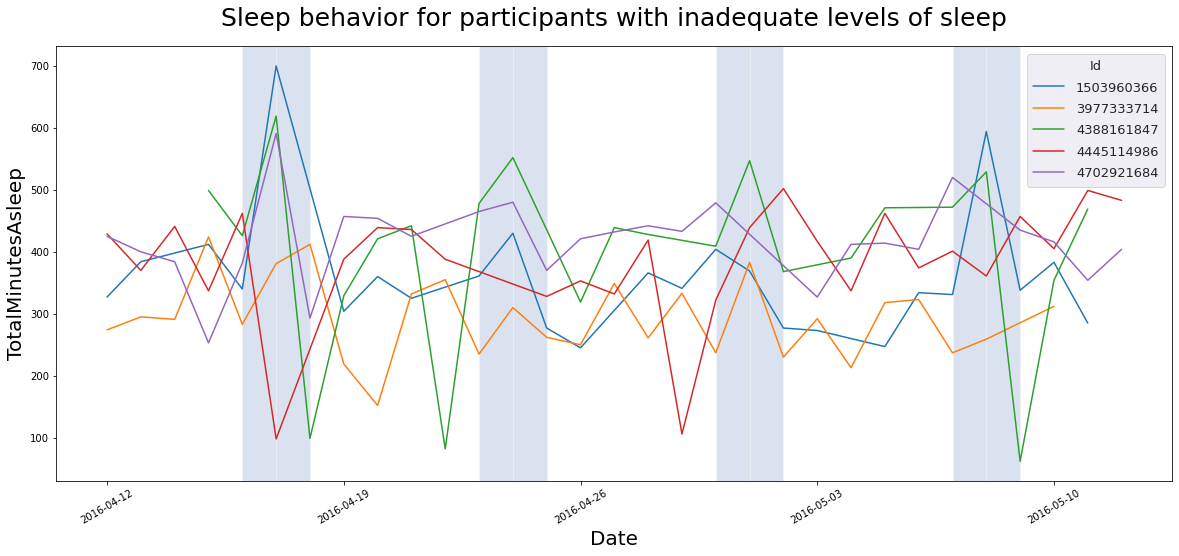

In [25]:
#plot individual sleep behavior
fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.4)
sns.lineplot(ax=ax, data=isa, x='Date', y='TotalMinutesAsleep', hue='Id', palette='tab10')
ax.set_title("Sleep behavior for participants with inadequate levels of sleep", fontsize=25, pad=20)
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1))
ax.tick_params(axis='x', rotation=30)
highlight_weekends(isa.Date.values, ax, 0.2)
ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel("TotalMinutesAsleep",fontsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize='13')
plt.setp(ax.get_legend().get_title(), fontsize='13')

In [26]:
inadequate_sleepers

array([1503960366, 3977333714, 4388161847, 4445114986, 4702921684])

In [27]:
inactive

array([1503960366, 2026352035, 2347167796, 4319703577, 4388161847,
       4445114986, 4702921684, 5553957443, 6117666160, 6962181067,
       8792009665])